# Machine Learning Project
by Alexandre Waerniers and Vincent Lamy,

students at Albert School x Mines Paris PSL

# Citation Request
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get project path
cwd = os.getcwd()
print(cwd)

d:\ALBERTSCHOOL\SupervisedML\supervised_ml_project_waerniers_lamy


In [2]:
# Link to web page : https://archive.ics.uci.edu/dataset/222/bank+marketing

bank_full = pd.read_csv(os.path.join(cwd, "data", "bank-additional-full.csv"), sep=";")
bank_test = pd.read_csv(os.path.join(cwd, "data", "bank-additional.csv"), sep=";")

In [4]:
""" 
Input variables:

Bank client data:

1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric) 
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)

Other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")
"""

' \nInput variables:\n\nBank client data:\n\n1 - age (numeric)\n2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") \n3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)\n4 - education (categorical: "unknown","secondary","primary","tertiary")\n5 - default: has credit in default? (binary: "yes","no")\n6 - balance: average yearly balance, in euros (numeric) \n7 - housing: has housing loan? (binary: "yes","no")\n8 - loan: has personal loan? (binary: "yes","no")\n\nRelated with the last contact of the current campaign:\n\n9 - contact: contact communication type (categorical: "unknown","telephone","cellular") \n10 - day: last contact day of the month (numeric)\n11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")\n12 - duration: last contact duration, in sec

In [3]:
if bank_full.columns.tolist() == bank_test.columns.tolist():
    print("All good !")
else:
    print("Dataframes do not have the same columns")

bank_full.info()

All good !
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4118

In [49]:
bank_full.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

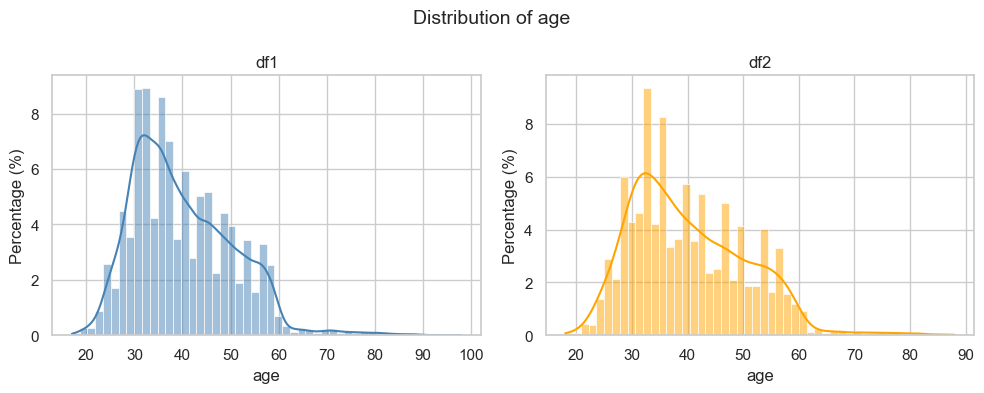

Bins for 'age':
[17.   18.62 20.24 21.86 23.48 25.1  26.72 28.34 29.96 31.58 33.2  34.82
 36.44 38.06 39.68 41.3  42.92 44.54 46.16 47.78 49.4  51.02 52.64 54.26
 55.88 57.5  59.12 60.74 62.36 63.98 65.6  67.22 68.84 70.46 72.08 73.7
 75.32 76.94 78.56 80.18 81.8  83.42 85.04 86.66 88.28 89.9  91.52 93.14
 94.76 96.38 98.  ]
--------------------------------------------------------------------------------


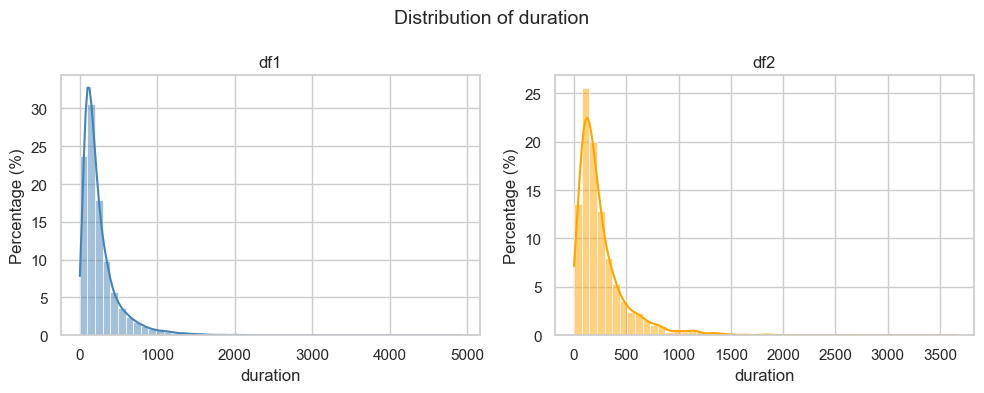

Bins for 'duration':
[   0.     98.36  196.72  295.08  393.44  491.8   590.16  688.52  786.88
  885.24  983.6  1081.96 1180.32 1278.68 1377.04 1475.4  1573.76 1672.12
 1770.48 1868.84 1967.2  2065.56 2163.92 2262.28 2360.64 2459.   2557.36
 2655.72 2754.08 2852.44 2950.8  3049.16 3147.52 3245.88 3344.24 3442.6
 3540.96 3639.32 3737.68 3836.04 3934.4  4032.76 4131.12 4229.48 4327.84
 4426.2  4524.56 4622.92 4721.28 4819.64 4918.  ]
--------------------------------------------------------------------------------


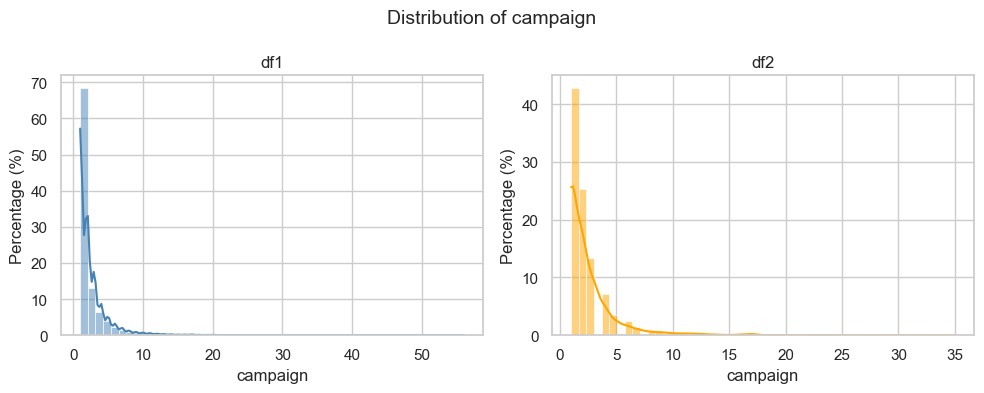

Bins for 'campaign':
[ 1.   2.1  3.2  4.3  5.4  6.5  7.6  8.7  9.8 10.9 12.  13.1 14.2 15.3
 16.4 17.5 18.6 19.7 20.8 21.9 23.  24.1 25.2 26.3 27.4 28.5 29.6 30.7
 31.8 32.9 34.  35.1 36.2 37.3 38.4 39.5 40.6 41.7 42.8 43.9 45.  46.1
 47.2 48.3 49.4 50.5 51.6 52.7 53.8 54.9 56. ]
--------------------------------------------------------------------------------


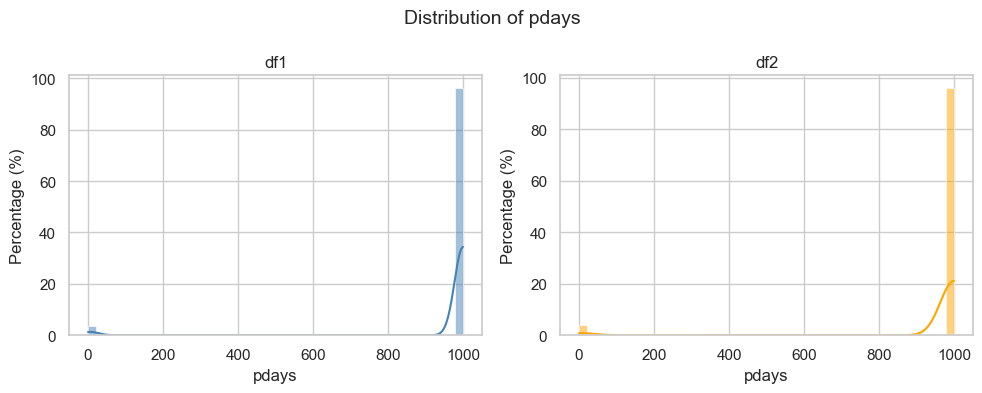

Bins for 'pdays':
[  0.    19.98  39.96  59.94  79.92  99.9  119.88 139.86 159.84 179.82
 199.8  219.78 239.76 259.74 279.72 299.7  319.68 339.66 359.64 379.62
 399.6  419.58 439.56 459.54 479.52 499.5  519.48 539.46 559.44 579.42
 599.4  619.38 639.36 659.34 679.32 699.3  719.28 739.26 759.24 779.22
 799.2  819.18 839.16 859.14 879.12 899.1  919.08 939.06 959.04 979.02
 999.  ]
--------------------------------------------------------------------------------


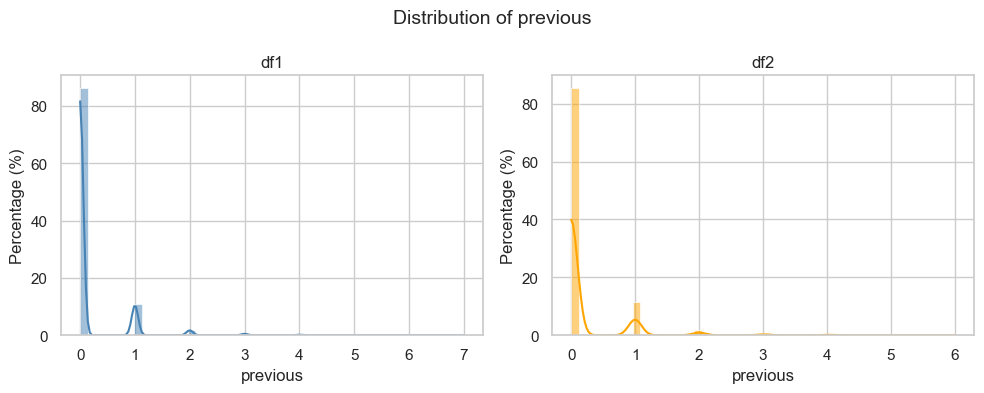

Bins for 'previous':
[0.   0.14 0.28 0.42 0.56 0.7  0.84 0.98 1.12 1.26 1.4  1.54 1.68 1.82
 1.96 2.1  2.24 2.38 2.52 2.66 2.8  2.94 3.08 3.22 3.36 3.5  3.64 3.78
 3.92 4.06 4.2  4.34 4.48 4.62 4.76 4.9  5.04 5.18 5.32 5.46 5.6  5.74
 5.88 6.02 6.16 6.3  6.44 6.58 6.72 6.86 7.  ]
--------------------------------------------------------------------------------


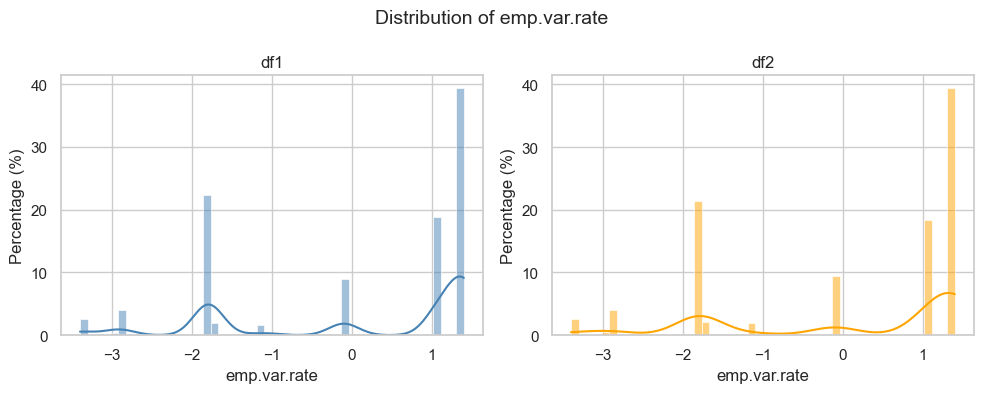

Bins for 'emp.var.rate':
[-3.4   -3.304 -3.208 -3.112 -3.016 -2.92  -2.824 -2.728 -2.632 -2.536
 -2.44  -2.344 -2.248 -2.152 -2.056 -1.96  -1.864 -1.768 -1.672 -1.576
 -1.48  -1.384 -1.288 -1.192 -1.096 -1.    -0.904 -0.808 -0.712 -0.616
 -0.52  -0.424 -0.328 -0.232 -0.136 -0.04   0.056  0.152  0.248  0.344
  0.44   0.536  0.632  0.728  0.824  0.92   1.016  1.112  1.208  1.304
  1.4  ]
--------------------------------------------------------------------------------


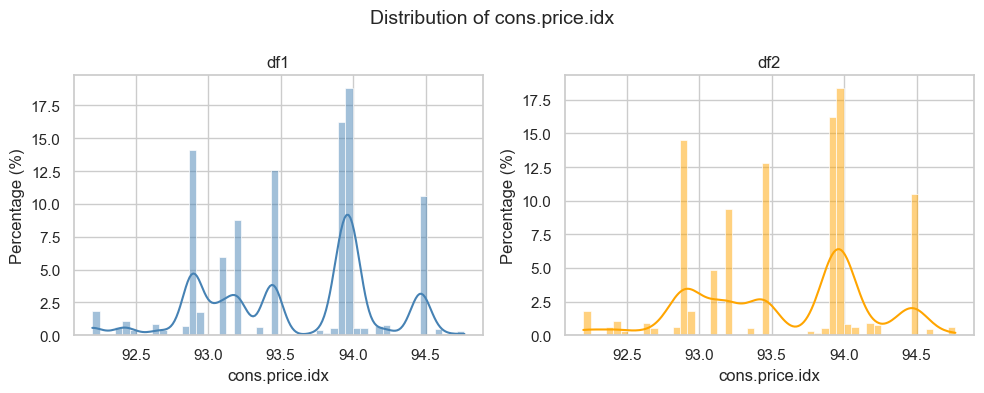

Bins for 'cons.price.idx':
[92.201   92.25232 92.30364 92.35496 92.40628 92.4576  92.50892 92.56024
 92.61156 92.66288 92.7142  92.76552 92.81684 92.86816 92.91948 92.9708
 93.02212 93.07344 93.12476 93.17608 93.2274  93.27872 93.33004 93.38136
 93.43268 93.484   93.53532 93.58664 93.63796 93.68928 93.7406  93.79192
 93.84324 93.89456 93.94588 93.9972  94.04852 94.09984 94.15116 94.20248
 94.2538  94.30512 94.35644 94.40776 94.45908 94.5104  94.56172 94.61304
 94.66436 94.71568 94.767  ]
--------------------------------------------------------------------------------


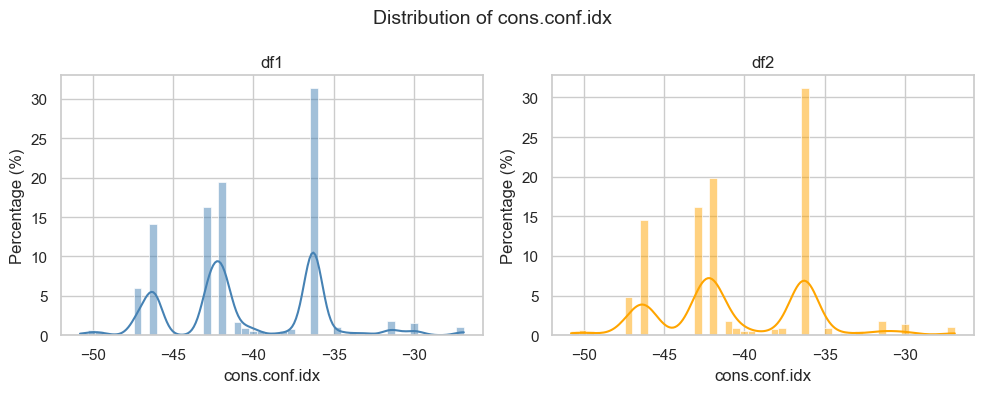

Bins for 'cons.conf.idx':
[-50.8   -50.322 -49.844 -49.366 -48.888 -48.41  -47.932 -47.454 -46.976
 -46.498 -46.02  -45.542 -45.064 -44.586 -44.108 -43.63  -43.152 -42.674
 -42.196 -41.718 -41.24  -40.762 -40.284 -39.806 -39.328 -38.85  -38.372
 -37.894 -37.416 -36.938 -36.46  -35.982 -35.504 -35.026 -34.548 -34.07
 -33.592 -33.114 -32.636 -32.158 -31.68  -31.202 -30.724 -30.246 -29.768
 -29.29  -28.812 -28.334 -27.856 -27.378 -26.9  ]
--------------------------------------------------------------------------------


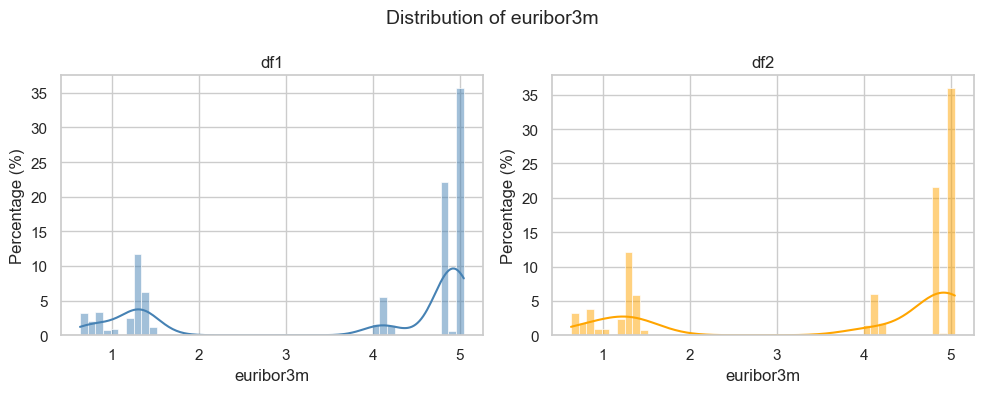

Bins for 'euribor3m':
[0.634   0.72222 0.81044 0.89866 0.98688 1.0751  1.16332 1.25154 1.33976
 1.42798 1.5162  1.60442 1.69264 1.78086 1.86908 1.9573  2.04552 2.13374
 2.22196 2.31018 2.3984  2.48662 2.57484 2.66306 2.75128 2.8395  2.92772
 3.01594 3.10416 3.19238 3.2806  3.36882 3.45704 3.54526 3.63348 3.7217
 3.80992 3.89814 3.98636 4.07458 4.1628  4.25102 4.33924 4.42746 4.51568
 4.6039  4.69212 4.78034 4.86856 4.95678 5.045  ]
--------------------------------------------------------------------------------


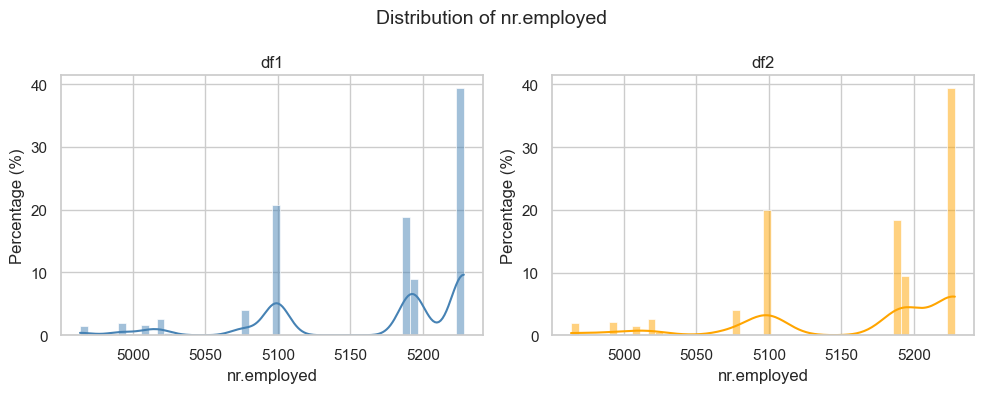

Bins for 'nr.employed':
[4963.6  4968.89 4974.18 4979.47 4984.76 4990.05 4995.34 5000.63 5005.92
 5011.21 5016.5  5021.79 5027.08 5032.37 5037.66 5042.95 5048.24 5053.53
 5058.82 5064.11 5069.4  5074.69 5079.98 5085.27 5090.56 5095.85 5101.14
 5106.43 5111.72 5117.01 5122.3  5127.59 5132.88 5138.17 5143.46 5148.75
 5154.04 5159.33 5164.62 5169.91 5175.2  5180.49 5185.78 5191.07 5196.36
 5201.65 5206.94 5212.23 5217.52 5222.81 5228.1 ]
--------------------------------------------------------------------------------


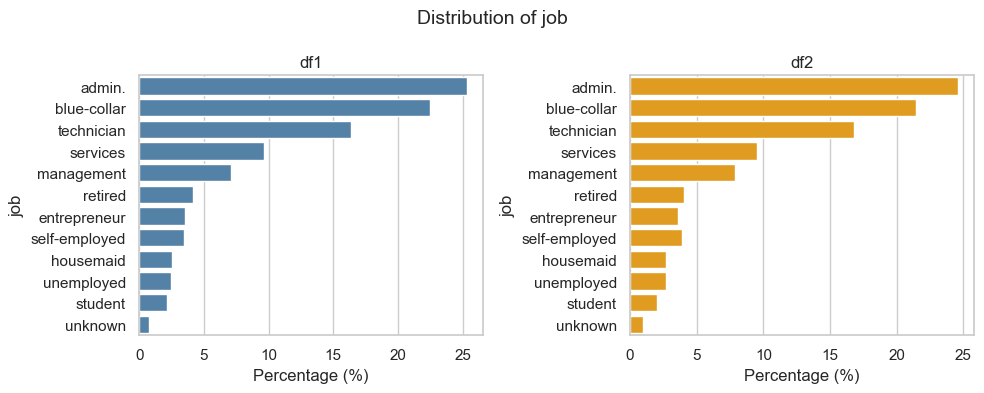

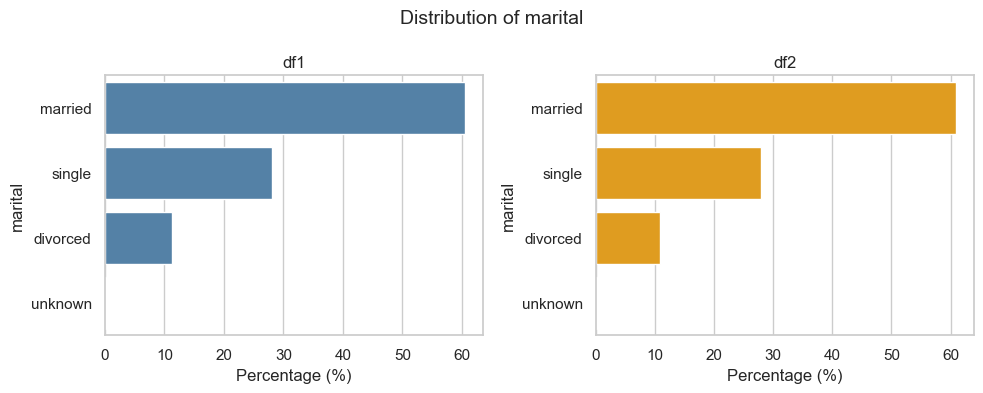

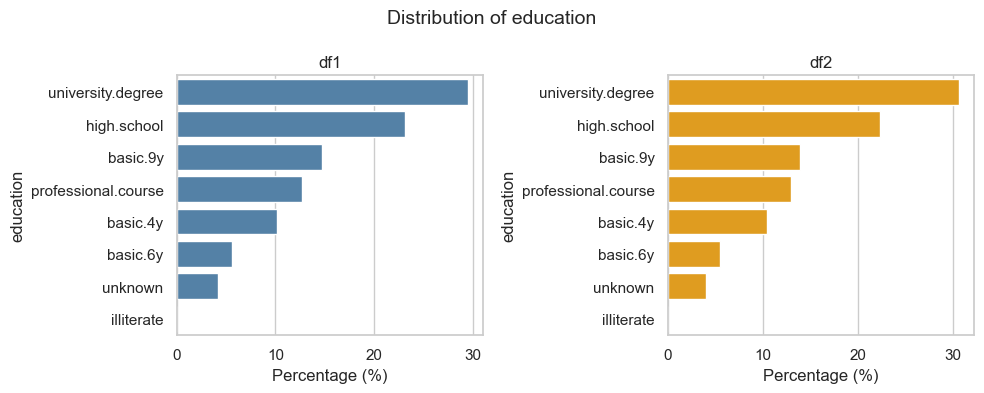

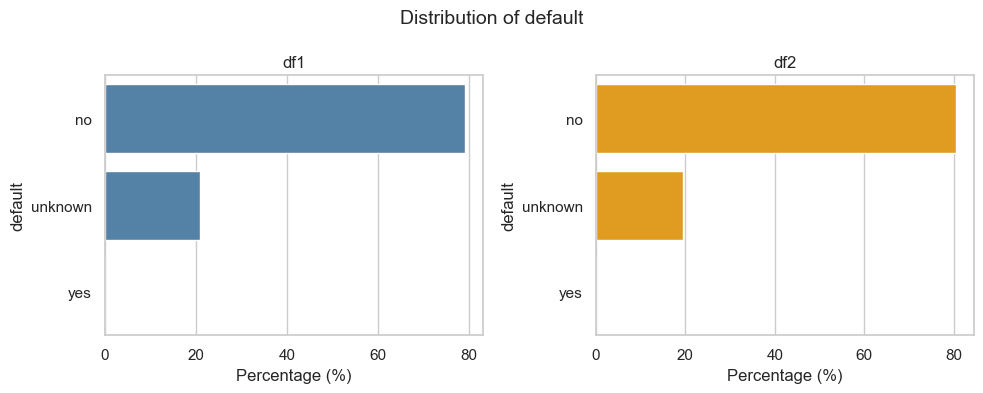

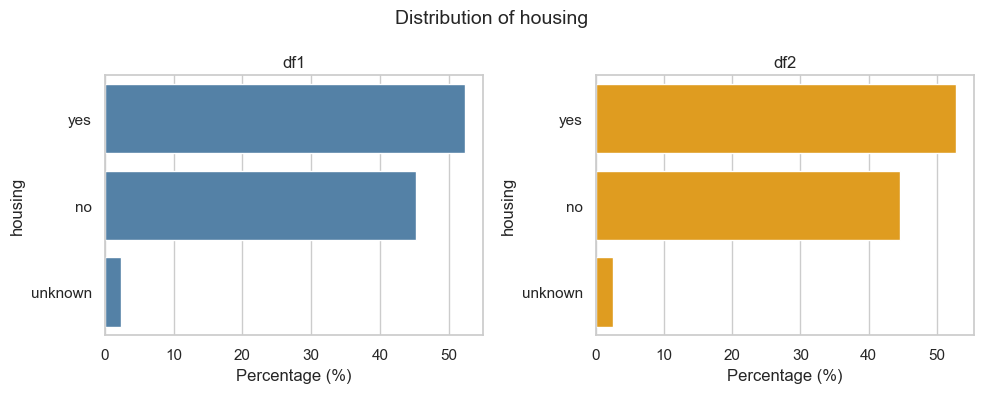

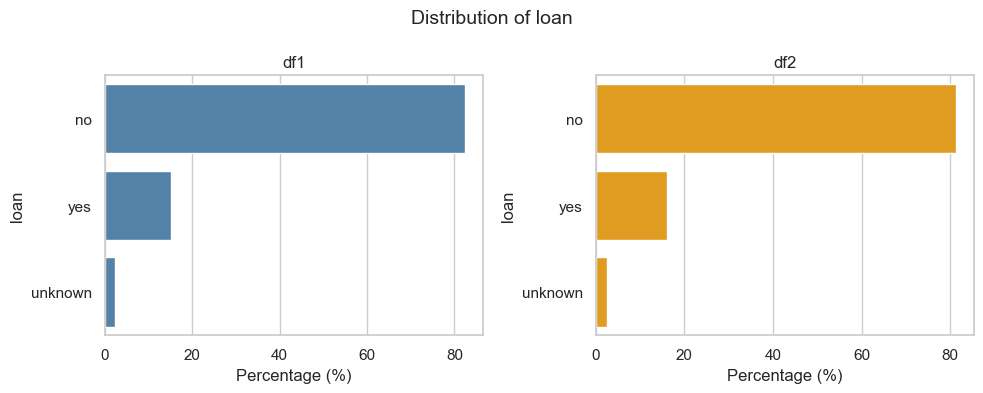

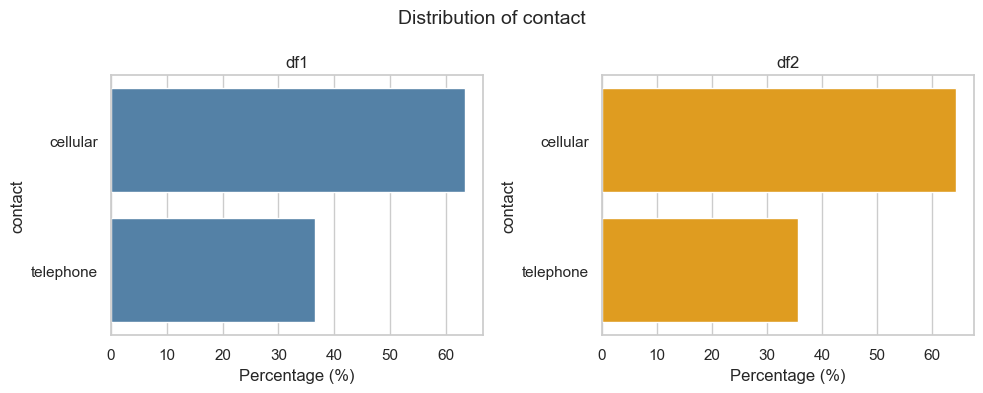

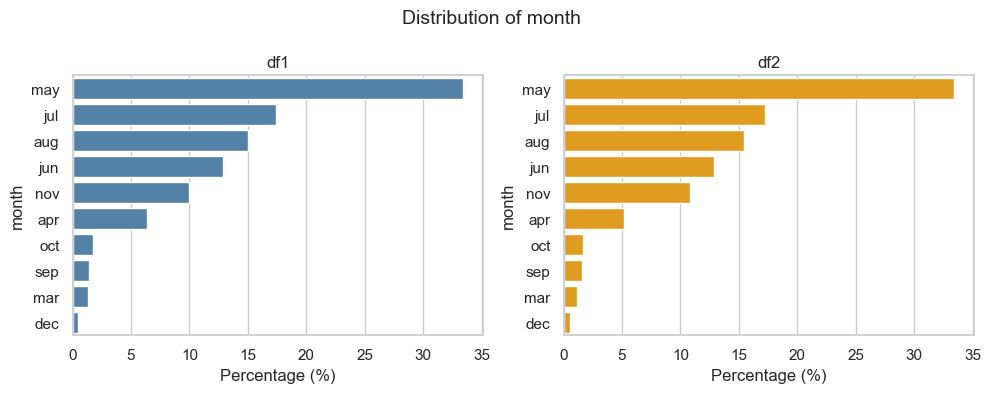

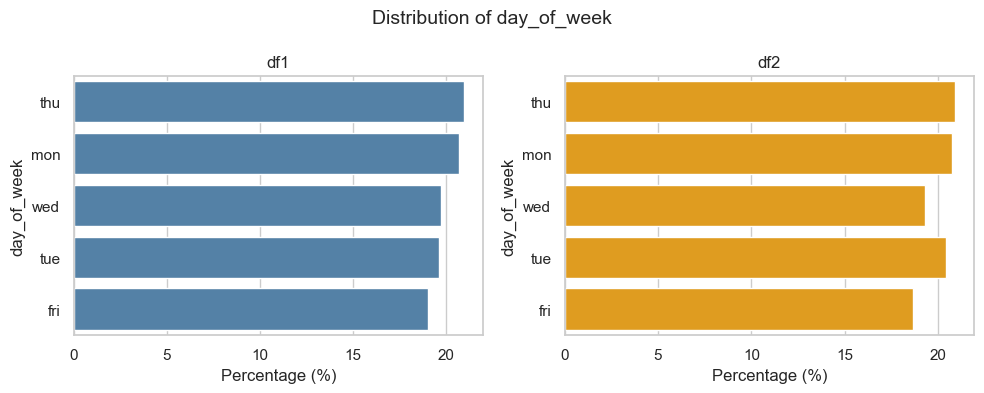

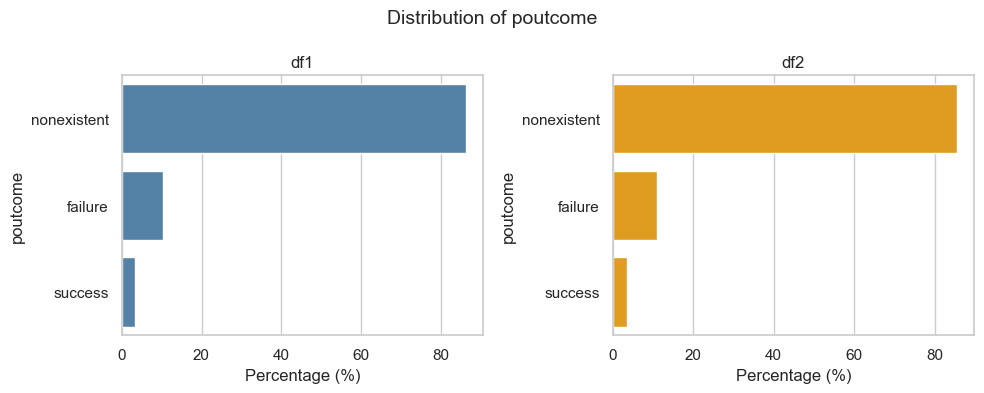

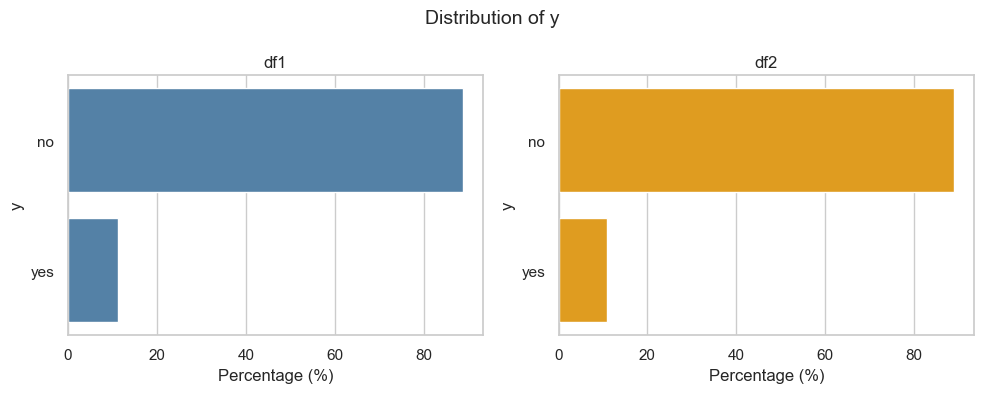

In [4]:
def compare_distributions(df1, df2, n_bins):
    """
    Plot side-by-side distributions for 2 DataFrames showing %
    """
    if df1.columns.tolist() == df2.columns.tolist():

        sns.set(style="whitegrid")

        num_cols = df1.select_dtypes(include=["number"]).columns
        cat_cols = df1.select_dtypes(include=["object", "category"]).columns

        # Numeric columns
        for col in num_cols:
            plt.figure(figsize=(10, 4))
            plt.suptitle(f"Distribution of {col}", fontsize=14)
            
            # Left-hand plot
            plt.subplot(1, 2, 1)
            sns.histplot(df1[col], bins=n_bins, kde=True, stat="percent", color="steelblue")
            plt.title("df1")
            plt.xlabel(col)
            plt.ylabel("Percentage (%)")

            # right-hand plot
            plt.subplot(1, 2, 2)
            sns.histplot(df2[col], bins=n_bins, kde=True, stat="percent", color="orange")
            plt.title("df2")
            plt.xlabel(col)
            plt.ylabel("Percentage (%)")

            plt.tight_layout()
            plt.show()

            # Print bin edges used
            bin_edges = np.histogram_bin_edges(df1[col].dropna(), bins=n_bins)
            print(f"Bins for '{col}':")
            print(bin_edges)
            print("-" * 80)

        # Categorical columns
        for col in cat_cols:
            plt.figure(figsize=(10, 4))
            plt.suptitle(f"Distribution of {col}", fontsize=14)

            # Compute normalized frequencies (%)
            df1_counts = (df1[col].value_counts(normalize=True) * 100).rename("df1_%")
            df2_counts = (df2[col].value_counts(normalize=True) * 100).rename("df2_%")

            combined = pd.concat([df1_counts, df2_counts], axis=1).fillna(0)
            combined = combined.reset_index().rename(columns={"index": col})

            # Train plot
            plt.subplot(1, 2, 1)
            sns.barplot(data=combined, y=col, x="df1_%", color="steelblue")
            plt.title("df1")
            plt.xlabel("Percentage (%)")
            plt.ylabel(col)

            # Test plot
            plt.subplot(1, 2, 2)
            sns.barplot(data=combined, y=col, x="df2_%", color="orange")
            plt.title("df2")
            plt.xlabel("Percentage (%)")
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()
        
    else:
        print("ERROR : Dataframes do not have the same columns")

compare_distributions(bank_full, bank_test, 50)